In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os
import cv2
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow
from tensorflow import keras
from keras.models import Sequential
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install emnist

In [3]:
from emnist import extract_test_samples
testimages, testlabels = extract_test_samples('bymerge')
testlabels = np.array(testlabels.astype('float32'))
final_test_x=np.load('/content/drive/My Drive/DATASET/final_test_x.npy')
final_test_y=np.load('/content/drive/My Drive/DATASET/final_test_y.npy')

In [4]:
testlabels.reshape(testlabels.shape[0])
test_y_integer = np.intp(testlabels)
print(test_y_integer.shape)
print(test_y_integer)

(116323,)
[24 22 28 ...  3  3  7]


In [5]:
letter_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',
             16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N', 24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',
             31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',
             46:'k',47:'l',48:'m',49:'n', 50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',
             61:'z'}

In [6]:
model = keras.models.load_model('/content/drive/My Drive/Model/model_v4.h5')

In [7]:
predictions = model.predict(final_test_x)
print(predictions)

3636/3636 [==============================] - 112s 31ms/step
[[4.22995120e-01 4.07372141e-07 2.03374057e-07 ... 2.89178490e-11
  3.55372815e-11 2.36797092e-11]
 [3.11936712e-23 4.14770291e-21 3.35872164e-20 ... 3.13659340e-18
  4.55507229e-18 2.54906935e-18]
 [4.73462292e-09 1.11162614e-10 1.28028732e-09 ... 5.27236371e-12
  6.17371302e-12 3.54588733e-12]
 ...
 [8.70858121e-15 1.35884030e-11 8.40037151e-10 ... 9.24858419e-15
  8.71353211e-15 9.98763738e-15]
 [6.30804825e-17 7.53746191e-16 1.11058098e-11 ... 1.77241882e-16
  1.14065507e-16 8.14403054e-17]
 [1.88908039e-21 9.02704717e-16 4.75846222e-16 ... 7.44408914e-21
  7.11874301e-21 7.54682190e-21]]


In [8]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[24 22 28 ...  3  3  7]


In [9]:
# find test images predicted correctly
correct = np.nonzero(classes == test_y_integer)[0]


# find test images predicted correctly
incorrect = np.nonzero(classes != test_y_integer)[0]

print()
print("Corretly classified images: ", len(correct))
print("Incorretly classified images: ", len(incorrect))
print("Accuracy: ", len(correct)/(len(correct)+len(incorrect)))


Corretly classified images:  105535
Incorretly classified images:  10788
Accuracy:  0.907258237837745


1/1 [==============================] - 0s 24ms/step


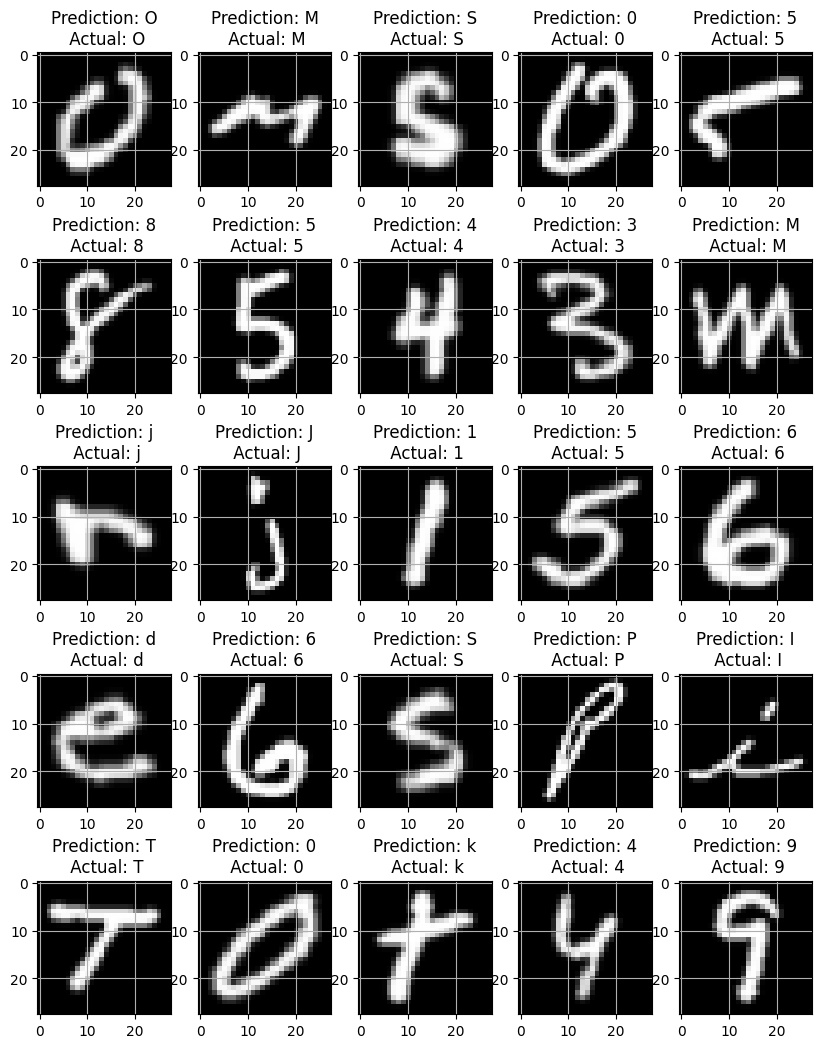

In [23]:
#Correct Predictions
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[correct[i]], (28,28))
    ax.imshow(img, cmap='gray')

    img = np.reshape(final_test_x[correct[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=letter_dict[np.argmax(pred)]
    actual=letter_dict[test_y_integer[correct[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()

1/1 [==============================] - 0s 25ms/step


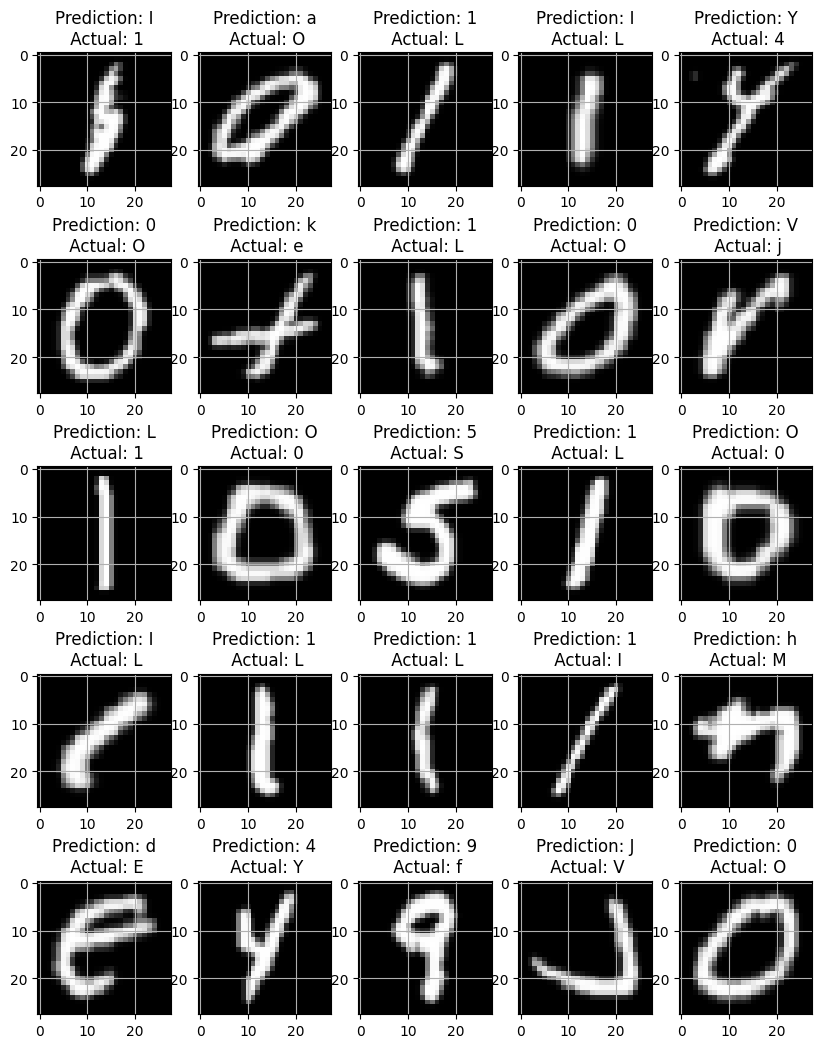

In [24]:
# Incorrect Predictions
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[incorrect[i]], (28,28))
    ax.imshow(img, cmap='gray')

    img = np.reshape(final_test_x[incorrect[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=letter_dict[np.argmax(pred)]
    actual=letter_dict[test_y_integer[incorrect[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()

## Predicting on Own Data

In [26]:
import os
import cv2

In [32]:
my_dir='/content/gdrive/MyDrive/OwnImage'
file_list=[]
own_data=[]

for root,dirs,files in os.walk(my_dir):
  for name in files:
    full_name=os.path.join(root,name)
    file_list.append(full_name)

for name in file_list:
  img_gray=cv2.imread(name,0)
  img_gray=cv2.resize(img_gray,(28,28))

  ret, img_binary=cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY)

  # Inverting the background
  img=cv2.bitwise_not(img_binary)
  value=img.flatten()
  own_data.append(value)

own_data=np.array(own_data)
own_data=own_data.astype('float32')

In [55]:
from google.colab.patches import cv2_imshow
img_gray=cv2.imread('/content/gdrive/MyDrive/OwnImage/H.png')


In [53]:
value=img.flatten()
owndata=[]
owndata.append(value)
owndata=np.array(owndata)

In [54]:
print(owndata.shape)

(1, 784)


In [ ]:
cv2_imshow(img_gray)

In [62]:
try:
  img_gray=cv2.resize(img_gray,(28,28))
except:
  print("Dont know")

ret, img_binary=cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY)
img=cv2.bitwise_not(img_binary)
value=img.flatten()
own_data.append(value)
own_data=np.array(own_data)
own_data=own_data.astype('float32')

Dont know


AttributeError: 'NoneType' object has no attribute 'flatten'

IndexError: index 0 is out of bounds for axis 0 with size 0

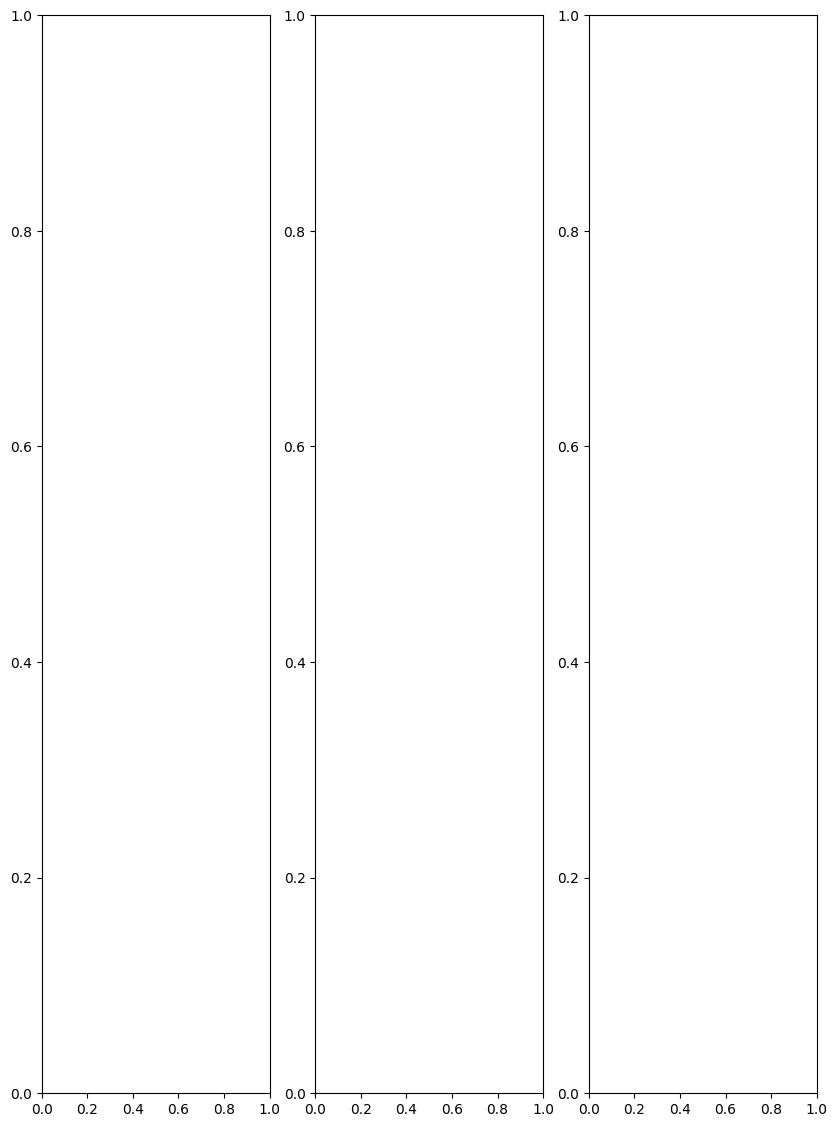

In [33]:
fig, axes = plt.subplots(1,3, figsize=(10,14))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(own_data[i], (28,28))
    ax.imshow(img, cmap='gray')

    data=np.reshape(own_data[i],(28,28))
    img = np.reshape(data, (1,28,28,1))
    pred=model.predict(img)
    ans=letter_dict[np.argmax(pred)]
    ax.set_title("Prediction: "+ans)
    ax.grid()